#K-means Code Practise

source:https://youtu.be/s_mgVRfLysY


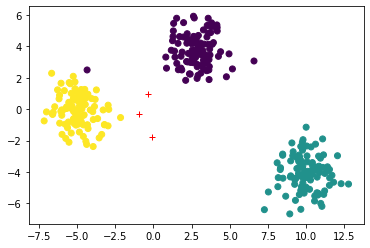

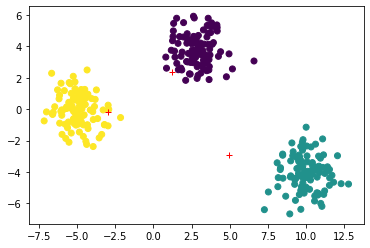

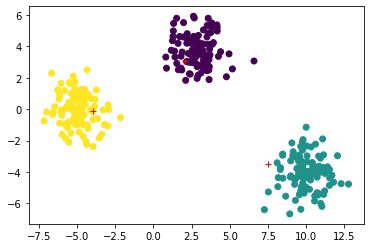

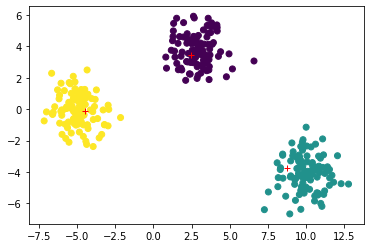

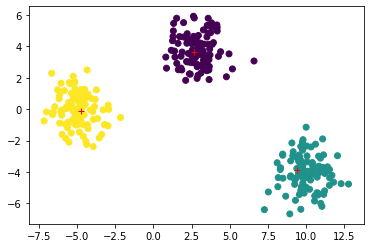

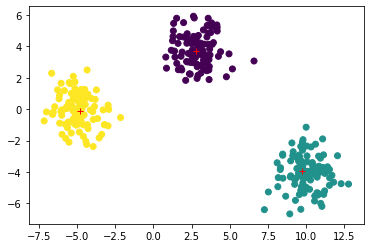

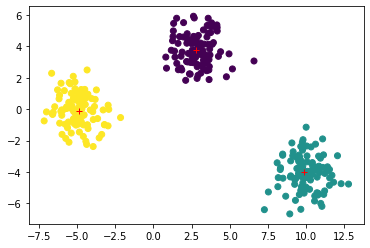

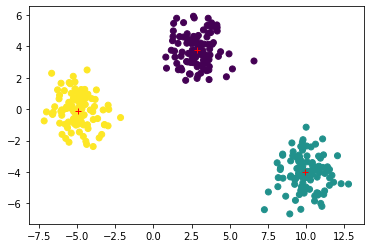

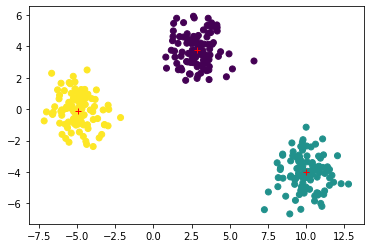

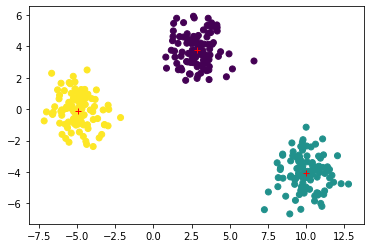

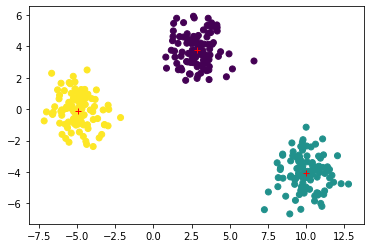

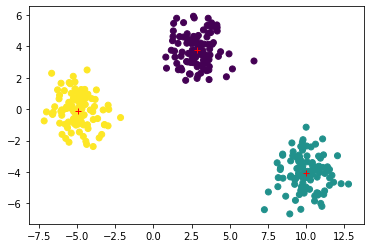

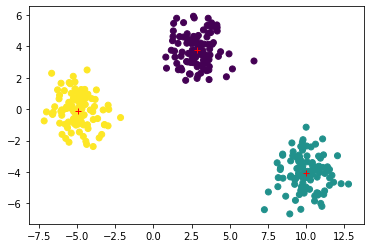

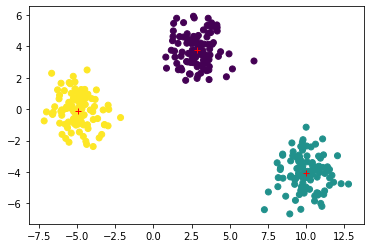

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

"""
Step 1: Generate data
Step 2: K-means
  2-1: init centroid
  2-2: Update class of point
  2-3: Update centroid
  2-4: repeat 2-2, 2-3 until converging
"""

def generate_data():
  class_1_data = np.random.randn(100,2) + np.array([3,4])
  class_2_data = np.random.randn(100,2) + np.array([10,-4])
  class_3_data = np.random.randn(100,2) + np.array([-5,0])
  return np.concatenate([class_1_data,class_2_data,class_3_data], axis = 0)

def kmeans(data,K):

  D = data.shape[1] #D=2
  N = data.shape[0] #N=300

  category = np.zeros(N) #the category of each data point
  centroid = np.random.randn(K,D) #the centoid of each category
  centroid_copy = centroid.copy()

  finished = False

  #Step 3:
  while not finished:

    #Step 1: update the category of each data point
    for j in range(N):

      nearest_centroid = None
      nearest_centroid_distance = float("inf")

      for k in range(K):

        dist_j_k = np.linalg.norm(centroid[k] - data[j])

        if dist_j_k < nearest_centroid_distance:
          nearest_centroid_distance = dist_j_k
          nearest_centroid = k
        
        category[j] = nearest_centroid
    
    plt.scatter(x = data[:,0],y = data[:,1], c=category)
    plt.plot(list(centroid[:,0]),list(centroid[:,1]),"r+")
    plt.show()

    #Step 2: update the centroid of each category based on current means
    lr = 0.5
    for j in range(K):

      new_centroid = np.mean(data[category == j], axis = 0)
      centroid[j] = new_centroid * lr + centroid[j] * (1-lr)

    mean_update = np.linalg.norm(np.linalg.norm(centroid-centroid_copy,axis=0).reshape(-1))
    centroid_copy = centroid.copy()
    if mean_update < 0.001:
      finished = True

data = generate_data()
kmeans(data,3)